In [39]:
#import libraries

from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [32]:
#load data
data = pd.read_csv('C:/Users/tnort/Documents/Datasets/nasa_clean.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219878,284.472296,0.079051,0.176763,417.388066,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True


In [33]:
data.shape

(4687, 36)

In [34]:
data.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination                     0
Asc Node Longitude              0
Orbital Period                  0
Perihelion Dis

In [35]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625394,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552410,34836.938250,9.680682,21.646663,51114.018740,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [36]:
#dropping identification columns
labels = [
  'Neo Reference ID',
  'Name',
  'Close Approach Date',
  'Est Dia in M(min)',
  'Est Dia in M(max)',
  'Est Dia in Miles(min)',
  'Est Dia in Miles(max)',
  'Est Dia in Feet(min)',
  'Est Dia in Feet(max)',
  'Miss Dist.(miles)',
  'Miss Dist.(lunar)',
  'Miss Dist.(Astronomical)'
]

data.drop(labels = labels , axis = 1, inplace = True)

In [37]:
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,7.889470e+11,6.115834,22017.00380,13680.50994,62753692.0,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,True
1,21.3,0.146068,0.326618,7.889470e+11,18.113985,65210.34609,40519.17311,57298148.0,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,False
2,20.3,0.231502,0.517654,7.895520e+11,7.590711,27326.56018,16979.66180,7622911.5,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,True
3,27.4,0.008801,0.019681,7.901570e+11,11.173875,40225.94819,24994.83986,42683616.0,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,False
4,21.6,0.127220,0.284472,7.901570e+11,9.840831,35426.99179,22012.95498,61010824.0,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,True


In [40]:
y = data['Hazardous']
le = LabelEncoder()
data['Hazardous'] = le.fit_transform(y)

In [41]:
data.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,7.889470e+11,6.115834,22017.00380,13680.50994,62753692.0,5,0.025282,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,1
1,21.3,0.146068,0.326618,7.889470e+11,18.113985,65210.34609,40519.17311,57298148.0,3,0.186935,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,0
2,20.3,0.231502,0.517654,7.895520e+11,7.590711,27326.56018,16979.66180,7622911.5,0,0.043058,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,1
3,27.4,0.008801,0.019681,7.901570e+11,11.173875,40225.94819,24994.83986,42683616.0,6,0.005512,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,0
4,21.6,0.127220,0.284472,7.901570e+11,9.840831,35426.99179,22012.95498,61010824.0,1,0.034798,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,1


In [42]:
data = setup(data = data, target = 'Hazardous', normalize = True)

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:13:43
Status,. . . . . . . . . . . . . . . . . .,Splitting Data
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Absolute Magnitude,Numeric
Est Dia in KM(min),Numeric
Est Dia in KM(max),Numeric
Epoch Date Close Approach,Numeric
Relative Velocity km per sec,Numeric
Relative Velocity km per hr,Numeric
Miles per hour,Numeric
Miss Dist.(kilometers),Numeric
Orbit Uncertainity,Categorical
Minimum Orbit Intersection,Numeric


In [43]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.996600,0.999900,0.986800,0.992600,0.989500,0.987500
1,Random Forest Classifier,0.996300,0.999600,0.981100,0.996200,0.988500,0.986300
2,Decision Tree Classifier,0.996000,0.992300,0.986700,0.988700,0.987600,0.985200
3,Extreme Gradient Boosting,0.996000,0.999700,0.982900,0.992500,0.987600,0.985200
4,Light Gradient Boosting Machine,0.996000,0.999900,0.984800,0.990700,0.987500,0.985200
5,Gradient Boosting Classifier,0.995400,0.999700,0.981000,0.990700,0.985700,0.983000
6,Ada Boost Classifier,0.995100,0.999800,0.984800,0.985100,0.984800,0.981900
7,Extra Trees Classifier,0.967100,0.994100,0.814600,0.977200,0.887600,0.868600
8,Logistic Regression,0.952400,0.986900,0.841100,0.861000,0.850100,0.821900
9,SVM - Linear Kernel,0.947000,0.000000,0.808900,0.857500,0.829400,0.798100


In [44]:
catboost_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9970,1.0000,0.9808,1.0000,0.9903,0.9885
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9939,0.9999,0.9811,0.9811,0.9811,0.9775
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9970,0.9998,1.0000,0.9815,0.9907,0.9888
5,0.9939,0.9999,0.9623,1.0000,0.9808,0.9771
6,0.9939,0.9999,0.9623,1.0000,0.9808,0.9771
7,0.9970,1.0000,1.0000,0.9815,0.9907,0.9888
8,0.9970,1.0000,0.9811,1.0000,0.9905,0.9887
9,0.9970,0.9999,1.0000,0.9815,0.9907,0.9888


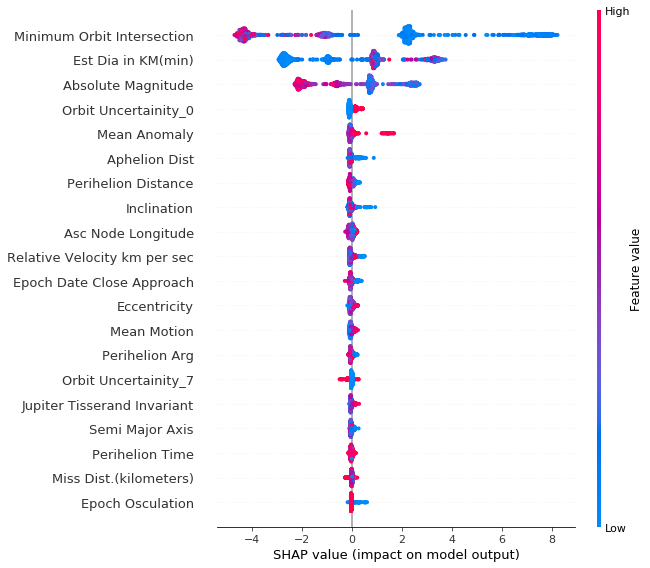

In [46]:
interpret_model(catboost_model)

In [47]:
tuned_catboost_model = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9970,0.9999,0.9808,1.0000,0.9903,0.9885
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9970,0.9999,1.0000,0.9815,0.9907,0.9888
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9909,0.9995,0.9623,0.9808,0.9714,0.9660
5,0.9939,0.9999,0.9623,1.0000,0.9808,0.9771
6,0.9848,0.9993,0.9245,0.9800,0.9515,0.9424
7,0.9970,1.0000,1.0000,0.9815,0.9907,0.9888
8,0.9970,0.9999,0.9811,1.0000,0.9905,0.9887
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


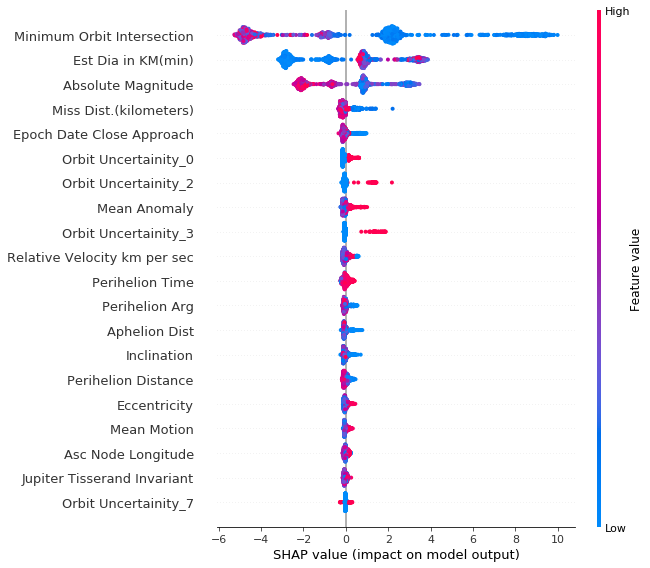

In [48]:
interpret_model(tuned_catboost_model)

In [49]:
#Lets check out the Random Forest Classifier
dt_model = create_model('dt')

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:21:11
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa


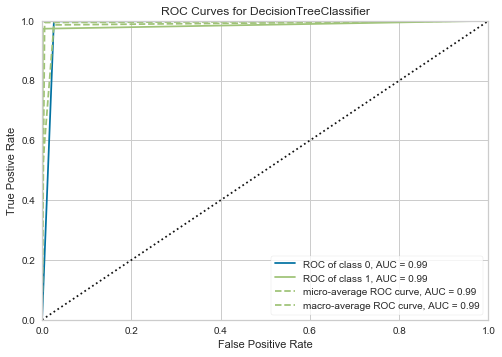

In [50]:
plot_model(dt_model)

In [55]:
tuned_dt_model = tune_model('dt')

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:21:43
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa


In [ ]:
plot_model(tuned_dt_model)

In [ ]:
rf_model = create_model('rf')

In [ ]:
plot_model(rf_model)

In [56]:
tuned_rf_model = tune_model('rf')

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:21:57
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Model
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,Accuracy,AUC,Recall,Prec.,F1,Kappa


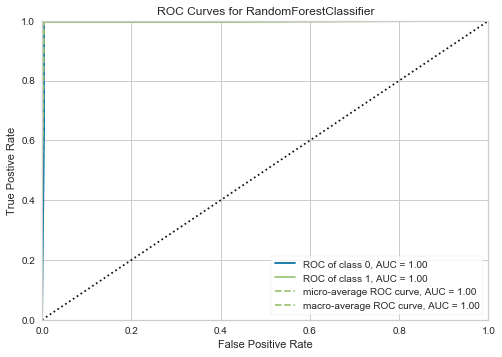

In [57]:
plot_model(tuned_rf_model)

In [59]:
#Lets evaluate the different models
evaluate_model(tuned_dt_model)

,Parameters
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,21
max_features,16
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,2
min_samples_split,2


In [60]:
evaluate_model(tuned_rf_model)

,Parameters
bootstrap,False
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,100
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


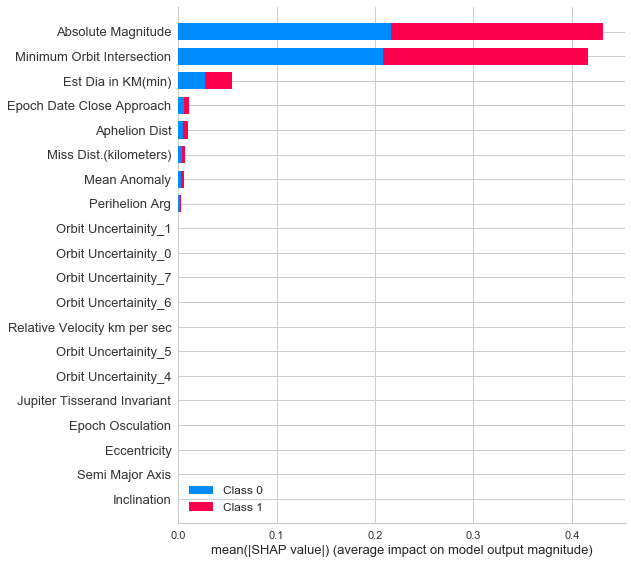

In [61]:
interpret_model(tuned_dt_model)

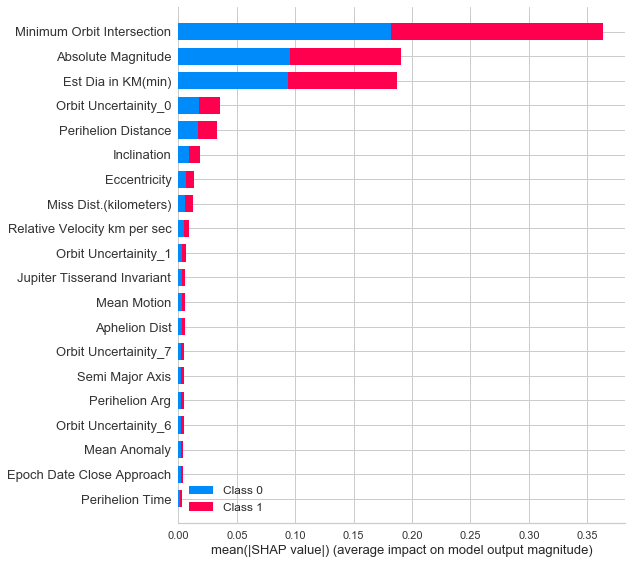

In [62]:
interpret_model(tuned_rf_model)

In [63]:
catboost_predictions_holdout = predict_model(tuned_catboost_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9964,0.9998,0.978,1.0,0.9889,0.9868


In [64]:
dt_predictions_holdout = predict_model(tuned_dt_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.995,0.9868,0.9692,1.0,0.9843,0.9814


In [65]:
rf_predictions_holdout = predict_model(tuned_rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.995,0.997,0.9692,1.0,0.9843,0.9814


In [66]:
#Catboost performed the best on unseen data/holdout 
#Lets finalize and then save the catboost model

final_catboost_model = finalize_model(tuned_catboost_model)

In [68]:
#saving
save_model(tuned_catboost_model, 'final_catboost_model')

Transformation Pipeline and Model Succesfully Saved


In [69]:
#lets save todays experiment alogn with the output
save_experiment('exp_05262020')

Experiment Succesfully Saved
